In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
df = pd.read_csv("MetObjects.csv")
df.head()

c:\users\megan\desktop\cisc367\venv\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (5,7,10,11,12,13,14,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [15]:
genders = df[df['Artist Gender'].notnull()]
genders.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
34,04.1a–c,True,True,False,35,706,The American Wing,1904.0,Vase,The Adams Vase,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/35,https://www.wikidata.org/wiki/Q83545838,NaN,"Metropolitan Museum of Art, New York, NY",Animals|Garlands|Birds|Men,http://vocab.getty.edu/page/aat/300249525|http...,https://www.wikidata.org/wiki/Q729|https://www...
111,68.69.17,False,False,False,120,774,The American Wing,1968.0,Andiron,Andiron,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
112,68.69.18,False,False,False,121,774,The American Wing,1968.0,Andiron,Andiron,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
203,64.202.1,False,False,False,239,743,The American Wing,1964.0,Armchair,Armchair,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
204,64.202.2,False,False,False,240,774,The American Wing,1964.0,Armchair,Armchair,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [14]:
# This is a mess
df['Artist Gender'].value_counts()

|                                               56254
||                                              20853
Female                                           8565
|||                                              6146
Female|                                          2625
                                                ...  
||||||||||||||||||||Female||                        1
||||||||||||||||||||||||||||||||||||||||||||        1
|Female|Female|Female||||||                         1
|Female|Female||Female|||Female||Female             1
|||||||||||||||||Female|||||                        1
Name: Artist Gender, Length: 277, dtype: int64

In [52]:
def parse_gender(gender: str) -> str:
    if gender == '|':
        return "male"
    elif gender == 'Female':
        return "female"
    all_pipe = True
    all_female = True
    for c in gender:
        if c != "|":
            all_pipe = False
    if gender.count("Female") == gender.count("|") + 1:
        return 'females'
    if all_pipe:
        return 'males'
    return "mixed"

#print(genders[genders["Artist Gender"]=="Female|"])
genders["Gender"] = genders.loc[:,"Artist Gender"].map(parse_gender)
genders[genders['Gender'] == 'males'].loc[:,["Gender", "Artist Gender"]].head(50)
genders.loc[:, ["Artist Gender","Gender"]].head(50)

# I spent a lot of time looking up examples on the Met's website to make sure I was interpreting the artist gender column correctly

<ipython-input-52-8de132eda615>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genders["Gender"] = genders.loc[:,"Artist Gender"].map(parse_gender)


,Artist Gender,Gender
34,|,male
111,|,male
112,|,male
203,|,male
204,|,male
220,|,male
221,|,male
241,|Female,mixed
265,|,male
266,|,male


In [53]:
genders['Gender'].value_counts()

male       56254
males      31567
female      8565
mixed       5240
females      181
Name: Gender, dtype: int64

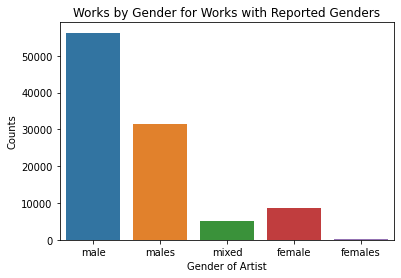

In [57]:
sns.countplot(x='Gender', data=genders,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders')

plt.show()

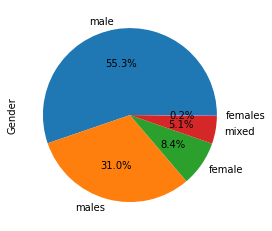

In [59]:
genders_data = genders['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #yikes

# Genders in modern art

In [62]:
genders_modern = genders[genders["Object Begin Date"] >= 1900]
genders_modern.loc[:, ["Title", "Object Begin Date"]]

,Title,Object Begin Date
241,Autumn Landscape,1923
405,Bench,1916
459,Bill Holder,1907
486,Blotter,1907
487,Blotter,1910
...,...,...
475473,"For Now is the Time of Christmas (from ""The Bo...",1930
475488,"Abstraction, No. 2 (Planes)",1932
475489,"The Artist's Studio, Provincetown (on Pamphlet...",1935
475492,Untitled (from American Abstract Artists Portf...,1937


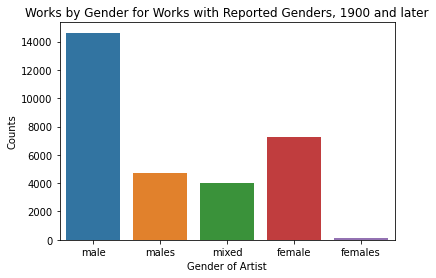

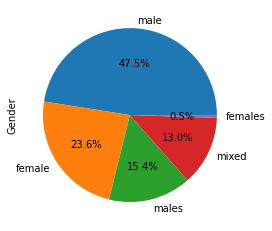

In [63]:
sns.countplot(x='Gender', data=genders_modern,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders, 1900 and later')

plt.show()

genders_data = genders_modern['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #slightly better!

# Works acquired after the 1989 Guerilla Girls piece

In [82]:
genders_new_acq = genders[genders["AccessionYear"].notnull()]

def parse_date(date)-> int:
    if isinstance(date,float) or isinstance(date,int):
        return int(date)
    else:
        return int(date[0:4])
genders_new_acq['AccessionYear'] = genders_new_acq.AccessionYear.map(parse_date)
genders_new_acq = genders_new_acq[genders_new_acq["AccessionYear"]>=1989]
genders_modern.loc[:, ["Title", "AccessionYear"]]

<ipython-input-82-2175d1bb5ffa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genders_new_acq['AccessionYear'] = genders_new_acq.AccessionYear.map(parse_date)


,Title,AccessionYear
34,The Adams Vase,1904.0
111,Andiron,1968.0
112,Andiron,1968.0
203,Armchair,1964.0
204,Armchair,1964.0
...,...,...
475589,Miss Worthy's Marriage,1959.0
475592,Taxing Us Rich from the Crown of Our Head to t...,1933.0
475593,"Chairman C. A. Dana Buttonholes U.S., from ""Time""",1933.0
475594,In Time All the World Likely to be Cossack or ...,1933.0


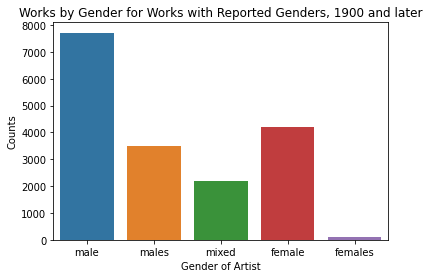

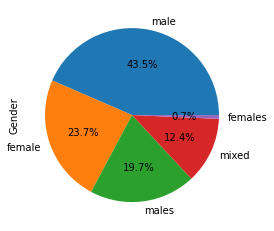

In [83]:
sns.countplot(x='Gender', data=genders_new_acq,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders, 1900 and later')

plt.show()

genders_data = genders_new_acq['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #also better

# Works Produced After Guerilla Girls Piece

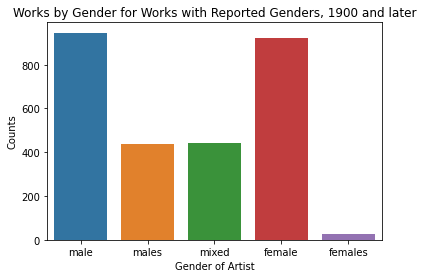

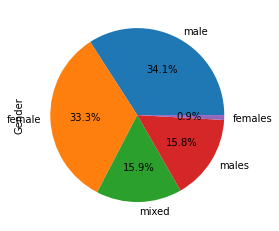

In [85]:
genders_contemp = genders[genders["Object Begin Date"] >= 1989]
sns.countplot(x='Gender', data=genders_contemp,
             order = ['male','males','mixed', 'female','females'])

plt.ylabel("Counts")
plt.xlabel("Gender of Artist")
plt.title('Works by Gender for Works with Reported Genders, 1900 and later')

plt.show()

genders_data = genders_contemp['Gender'].value_counts()
genders_data.plot.pie(autopct="%.1f%%")
plt.show() #also better